# Percolation analysis

 ### Set up

In [1]:

import matplotlib.pyplot as plt

import config
from config import LEVELS
from create_full_graph_with_single_query import read_or_create_full_graph
from lib.percolation import getCompletenessValues, sampleWithLinkPercolation
from itertools import repeat
import pandas as pd

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


 ### Create full interaction Networks for Genes, Proteins and Proteoforms

In [2]:
graphs = { l: read_or_create_full_graph(l, True, config.GRAPHS_PATH) for l in LEVELS}
graphs_no_sm = [read_or_create_full_graph(level, False, config.GRAPHS_PATH, v=False) for level in LEVELS]

    Reading resources\Reactome\genes_interactions.tsv
    Reading resources\Reactome\genes_vertices.tsv
    Reading resources\Reactome\genes_small_molecules_vertices.tsv
        Graph edges: 457443
        Graph nodes: 12789
        Graph genes nodes: 10804
        Graph small molecule nodes: 1947
    Reading resources\Reactome\proteins_interactions.tsv
    Reading resources\Reactome\proteins_vertices.tsv
    Reading resources\Reactome\proteins_small_molecules_vertices.tsv
        Graph edges: 466752
        Graph nodes: 12903
        Graph proteins nodes: 10902
        Graph small molecule nodes: 1963
    Reading resources\Reactome\proteoforms_interactions.tsv
    Reading resources\Reactome\proteoforms_vertices.tsv
    Reading resources\Reactome\proteoforms_small_molecules_vertices.tsv
        Graph edges: 679747
        Graph nodes: 16040
        Graph proteoforms nodes: 14039
        Graph small molecule nodes: 1963
    Reading resources\Reactome\genes_interactions.tsv
    Reading r

### Sample completeness vs lcc size

In [4]:
num_completeness_points = 20
num_replicates = 5

P = getCompletenessValues(num_completeness_points)
samples = {level: sampleWithLinkPercolation(P, graphs[level], num_replicates) for level in LEVELS}
for level in LEVELS:
    samples[level]['level'] = list(repeat(level, num_replicates * num_completeness_points))
#    print(level)
#    print(samples[level])
samples = pd.concat([samples[level] for level in LEVELS])
samples

	Completeness: 1.0 	 Graph edges: 457443 	 Size of lcc: 0.8315740089139104
	Completeness: 0.9473684210526315 	 Graph edges: 433367 	 Size of lcc: 0.826335131753851
	Completeness: 0.894736842105263 	 Graph edges: 409291 	 Size of lcc: 0.8235202126827743
	Completeness: 0.8421052631578947 	 Graph edges: 385215 	 Size of lcc: 0.8199233716475096
	Completeness: 0.7894736842105263 	 Graph edges: 361139 	 Size of lcc: 0.8165611072015013
	Completeness: 0.7368421052631579 	 Graph edges: 337063 	 Size of lcc: 0.8131206505590742
	Completeness: 0.6842105263157894 	 Graph edges: 312987 	 Size of lcc: 0.8090546563452967
	Completeness: 0.631578947368421 	 Graph edges: 288911 	 Size of lcc: 0.8024865118461177
	Completeness: 0.5789473684210527 	 Graph edges: 264835 	 Size of lcc: 0.7972476346860583
	Completeness: 0.5263157894736842 	 Graph edges: 240759 	 Size of lcc: 0.7897411838298538
	Completeness: 0.47368421052631576 	 Graph edges: 216683 	 Size of lcc: 0.7798107748846665
	Completeness: 0.4210526315

,index,Completeness,Relative Size,level
0,0,1.000000,0.831574,genes
1,1,0.947368,0.826335,genes
2,2,0.894737,0.823520,genes
3,3,0.842105,0.819923,genes
4,4,0.789474,0.816561,genes
...,...,...,...,...
95,95,0.210526,0.638279,proteoforms
96,96,0.157895,0.608853,proteoforms
97,97,0.105263,0.565087,proteoforms
98,98,0.052632,0.480985,proteoforms


### Plot link percolation curves at 3 granularity levels

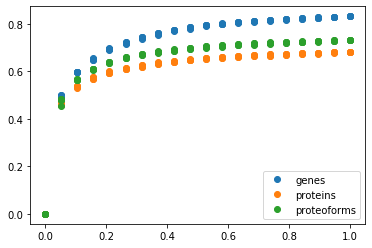

In [5]:
groups = samples.groupby('level')

for name, group in groups:
    plt.plot(group['Completeness'], group['Relative Size'], 'o', label=name)
plt.legend()
plt.show()

In [ ]:

# Edge percolation

# TODO: Make scatter plot where each dot is a disease.
#  Number of genes (x) VS Observed module size (y)
# The observed module size is the number of vertices in the lcc of the disease module

